In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [91]:
df = pd.read_csv("train_titanic (2).csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabina,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [92]:
selected_column = 'Embarked'
# Get the value counts for each unique value in the specified column
value_counts = df[selected_column].value_counts()
# i found "s" the most repeted one so i will fill "Embarked" with s
df[selected_column] = df[selected_column].fillna("s")

In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabina       204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
sex_mapping = {'female': 0, 'male': 1} #wake up bro
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

df['Sex_with_mapping'] = df['Sex'].map(sex_mapping)

df['Embarked_with_mapping'] = df['Embarked'].map(embarked_mapping)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabina,Embarked,Sex_with_mapping,Embarked_with_mapping
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1.0


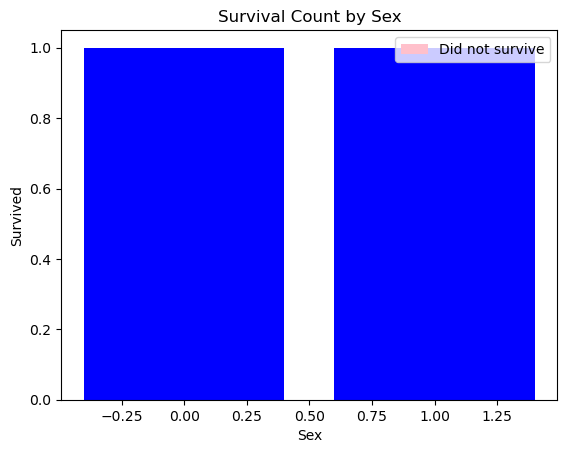

In [95]:
plt.bar(df['Sex_with_mapping'], df['Survived'], color=['pink', 'blue'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival Count by Sex')

# Add legend
plt.legend(['Did not survive', 'Survived'], loc='upper right')

plt.show()

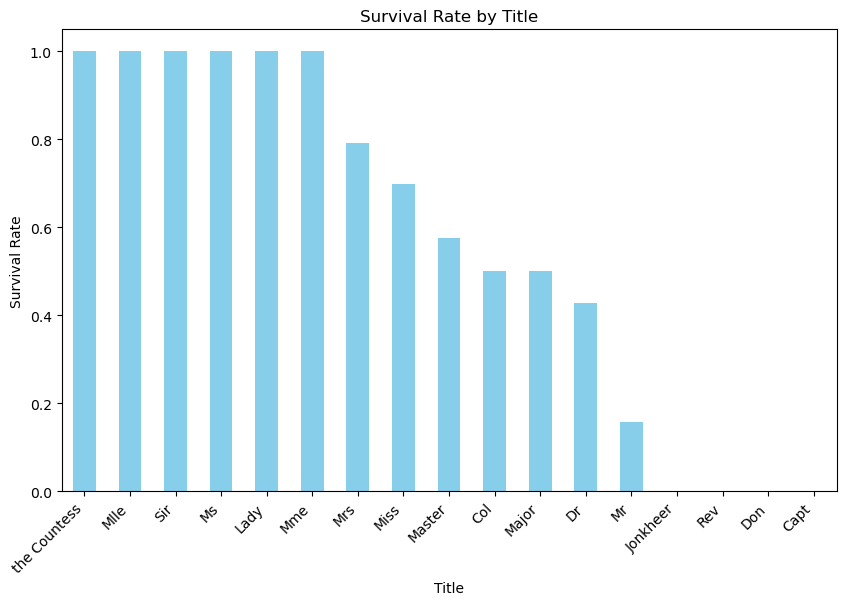

In [96]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# Plot Title & Survived in a bar chart
plt.figure(figsize=(10, 6))
title_survived = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
title_survived.plot(kind='bar', color='skyblue')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title')
plt.xticks(rotation=45, ha='right')
plt.show()

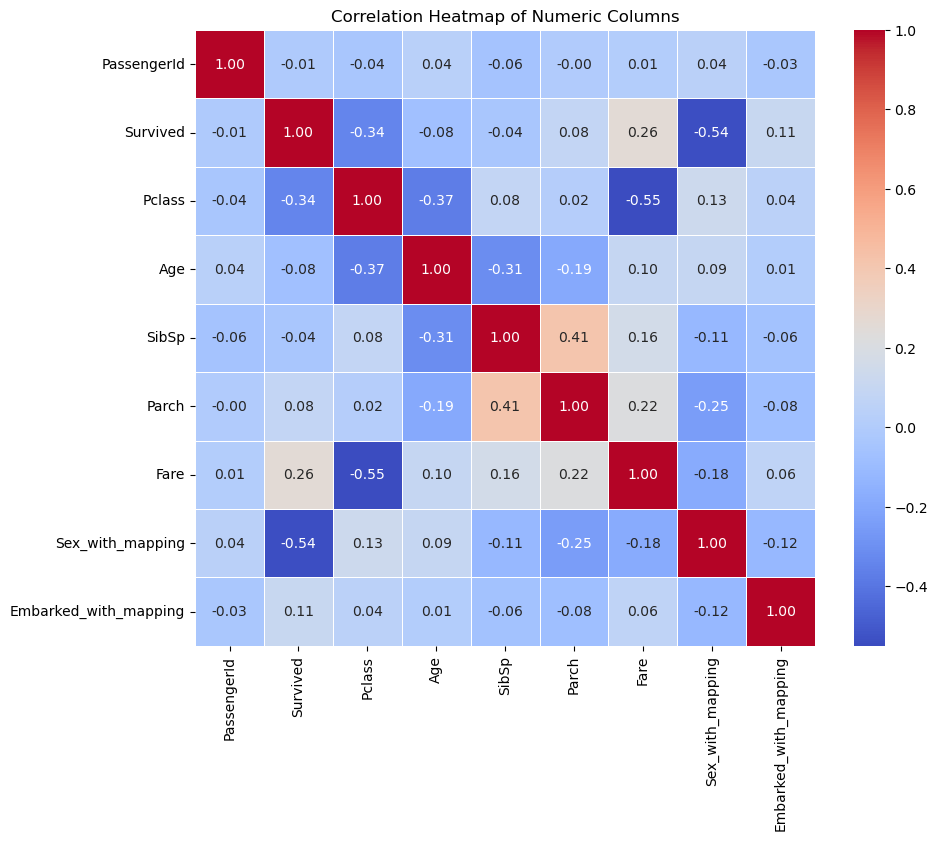

In [97]:
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [104]:
missing_values = df.isnull().sum()
missing_values

PassengerId                0
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                      177
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Embarked                   0
Sex_with_mapping           0
Embarked_with_mapping      2
Title                      0
dtype: int64

In [105]:
column_with_max_nulls = missing_values.idxmax()

# Drop the column with the highest number of nulls
df = df.drop(columns=[column_with_max_nulls])

In [106]:
scaler = MinMaxScaler()

fare_values = df['Fare'].values.reshape(-1, 1)

df['Fare_scaled'] = scaler.fit_transform(fare_values)

print("DataFrame after applying MinMaxScaler to the 'Fare' column:")
print(df[['Fare', 'Fare_scaled']].head())


DataFrame after applying MinMaxScaler to the 'Fare' column:
      Fare  Fare_scaled
0   7.2500     0.014151
1  71.2833     0.139136
2   7.9250     0.015469
3  53.1000     0.103644
4   8.0500     0.015713


D:\Anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of data points in each cluster:
cluster
1    217
0    186
2    173
3    138
Name: count, dtype: int64


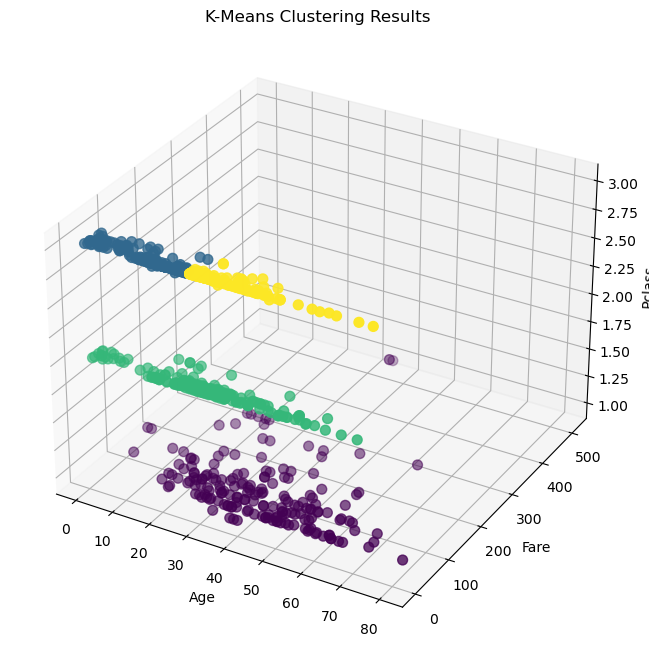

In [107]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Extract the specified columns (age, fare, pclass)
selected_columns = ['age', 'fare', 'pclass']
data = titanic[selected_columns].dropna()

# Apply MinMaxScaler to standardize the features (optional but recommended for k-means)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply k-means clustering with k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Print the number of data points in each cluster
cluster_counts = data['cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)

# Visualize the clusters in 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['fare'], data['pclass'], c=data['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
ax.set_title('K-Means Clustering Results')
plt.show()

In [87]:
# Select features and target variable
X = titanic[['pclass', 'age']]
y = titanic['fare']

# Drop rows with missing values
data = pd.concat([X, y], axis=1).dropna()

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data[['pclass', 'age']], data['fare'], test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics (for regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2%}')


Mean Squared Error: 3364.92
R^2 Score: 19.18%


In [108]:
#task 7
df = df.drop_duplicates()
df['Name'] = df['Name'].str.lower()
